In [1]:
import numpy as np
import pandas as pd
import scipy.spatial.distance as dist
import collections 

# start

In [507]:
def random_gen(k, var,n):
    """
        Function to generate the Gaussian Mixture dataset. 
        Input: k,  number of clusters. var, the variance. n, number of sample sizes(rows) 
        Output: Matrix with n+k points, 15 dimensions(cols), centered at the origin. 
        Also returns the cluster centers(for cost computation)
    """

    #sample k centers 
    k_centers = np.random.multivariate_normal(np.zeros(15),  np.eye(15)*var, k)
    
    step=round(n/k)
    points=np.ones([step*k,15])
    for i in range(k):
        newpoints = np.random.multivariate_normal(k_centers[i],np.eye(15),size=round(n/k))
        points[i*(step):(i*(step)+(step)),:]=newpoints
    points=np.append(points,k_centers,axis=0)
    np.random.shuffle(points)
    return(points,k_centers)


In [438]:
#generate gaussian mixuture dataset with 100000 observations, 10 groups and 10 variance
data_ful=gaussian_mixture_data(10,10,10000)
data=data_ful[0]

In [408]:
from sklearn.cluster import kmeans
def navie_result(data,num_ini_cluster, l):
    """
        Function to return initial centroids, final centrioids and label in dictionary form from
        three differnet algorithms(random, k-means++, k-means||)
        Input: data,  oringial dataframe. num_ini_cluster, number of cluster. l, oversampling factors 
        Output: dictionary with initial centroids, final centrioids and label
    """
    c0 = np.empty([num_ini_cluster,data.shape[1]])
    c = np.random.choice(np.arange(len(data)), num_ini_cluster)
    c1 = data[c,:]
    c2 = kmeans_pp(1, data, num_ini_cluster)
    c3 = kmeans_II(data, num_ini_cluster, l, max_iter=10000)
    initial_centroid = np.array([c0, c1,c2,c3])
    
    label = np.empty([data.shape[0]])
    
    for i in np.arange(1, 1+ 3):
        k = KMeans(n_clusters = num_ini_cluster, init = initial_centroid[i], n_init = 1).fit_predict(data)
        label = np.vstack([label, k])
    
    fin_cen = np.empty([num_ini_cluster,data.shape[1]])
    for i in np.arange(1, 1+3):
        k = kmeans(data,num_ini_cluster ,initial_centroid[i])
        
        fin_cen = np.dstack((fin_cen,k))
    
    return {"Initial_centroid":initial_centroid, "label":label, "Final_centroid" :fin_cen }

In [674]:
dict = navie_result(data, 10, 10)

(4, 10, 15)
Algorithm converged after 17 iterations.
(10, 15, 2)
Algorithm converged after 26 iterations.
(10, 15, 3)
Algorithm converged after 49 iterations.
(10, 15, 4)


In [440]:
import matplotlib.pyplot as plt
def test_cluster(ini_cen, fin_cen, label,data, title):
    """
    Function to plot scatter plot of first two columns(features) of dataframe
    Input: data,  oringial dataframe. ini_cen, entries of first two columns from initial centroids. 
    fin_cen, entries of first two columns from final centroids.
    label, which group each observation belongs to
    title, title of the plot
    Output: scatter plot
    """
    
    plt.scatter(data[:, 0], data[:, 1], c= label)
    for i in range(np.unique(label).size):
        if i > 0:
            plt.scatter(ini_cen[i,0],ini_cen[i,1],marker = '+', c = 'red', s= 100)
            plt.scatter(fin_cen[i,0],fin_cen[i,1],marker = '*', c = 'blue', s= 100)
        else:
            plt.scatter(ini_cen[i,0],ini_cen[i,1],marker = '+', c = 'red', s= 100, label = "Initial Cluster")
            plt.scatter(fin_cen[i,0],fin_cen[i,1],marker = '*', c = 'blue', s= 100, label = "Final Cluster")
    
    plt.legend(loc='best', prop={'size':15})
    plt.title(title)

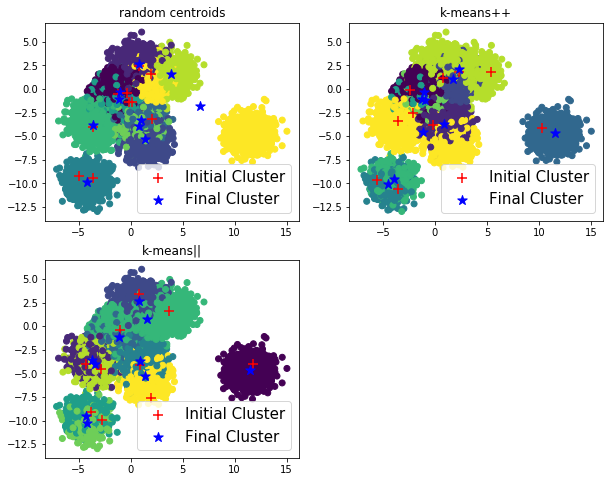

In [441]:
title = ["random centroids", "k-means++", "k-means||"]
plt.figure(1,figsize=(10,8))
for i in np.arange(1,4):
    plt.subplot(220+i)
    test_cluster(dict['Initial_centroid'][i], dict['Final_centroid'][:,:,i], dict['label'][i],data, title[i-1])
plt.show()